In [1]:
from fastai.vision.all import *

In [4]:
path = untar_data(f"{URLs.PETS}")

In [6]:
path.ls()

(#2) [Path('/home/neal/.fastai/data/oxford-iiit-pet/images'),Path('/home/neal/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
files = get_image_files(path / "images")

In [8]:
files[0], files[6]

(Path('/home/neal/.fastai/data/oxford-iiit-pet/images/keeshond_67.jpg'),
 Path('/home/neal/.fastai/data/oxford-iiit-pet/images/newfoundland_111.jpg'))

In [9]:
def label_func(f):
    return f[0].isupper()

In [11]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

In [12]:
dls.show_batch()

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/neal/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [14]:
learn.predict(files[0])

('False', tensor(0), tensor([1.0000e+00, 4.2125e-08]))

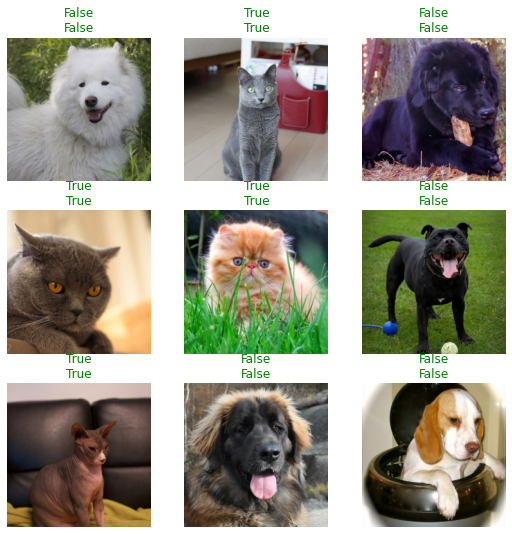

In [15]:
learn.show_results()

In [16]:
files[0].name

'keeshond_67.jpg'

In [17]:
pat = r"^(.*)_\d+.jpg"

In [18]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

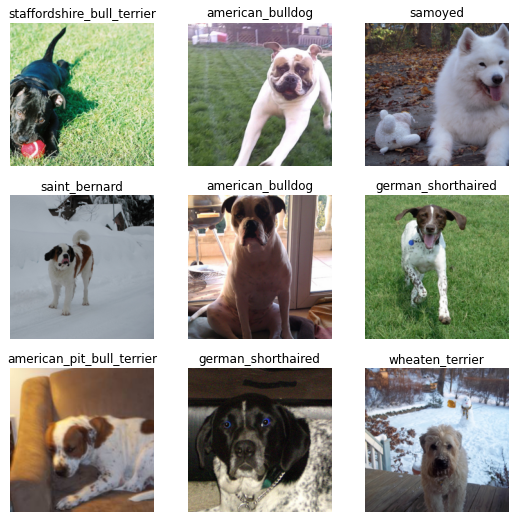

In [20]:
dls.show_batch()

In [21]:
dls = ImageDataLoaders.from_name_re(
    path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224)
)

In [22]:
dls.show_batch()

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [24]:
learn.lr_find()

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.007585775572806597)

In [25]:
learn.fine_tune(4, 3e-3)

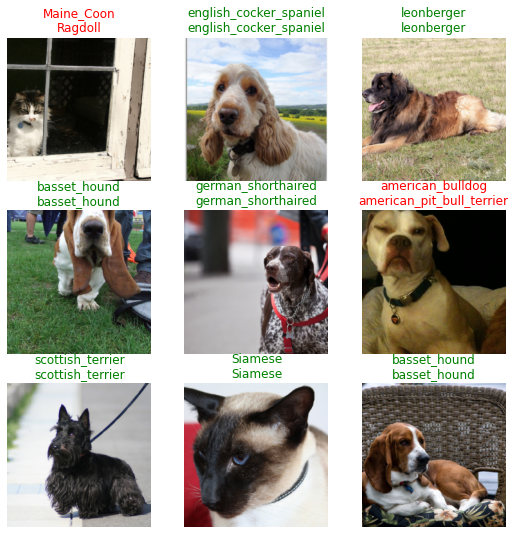

In [26]:
learn.show_results()

In [27]:
interp = Interpretation.from_learner(learn)

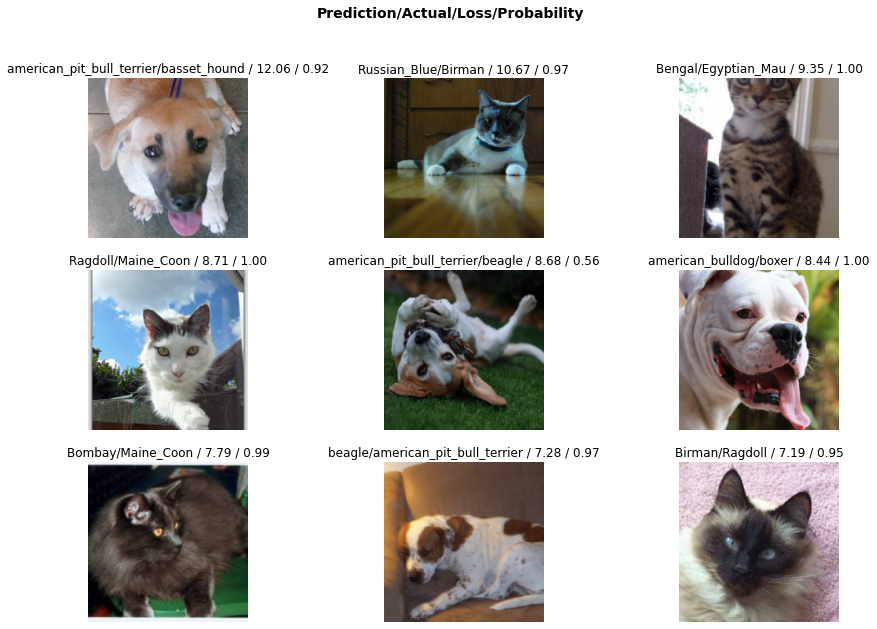

In [28]:
interp.plot_top_losses(9, figsize=(15, 10))

In [29]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=using_attr(RegexLabeller(r"(.+)_\d+.jpg$"), "name"),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224),
)

In [30]:
dls = pets.dataloaders(untar_data(URLs.PETS) / "images")

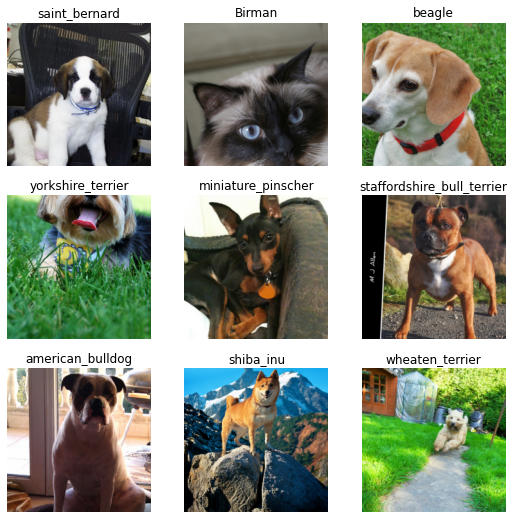

In [31]:
dls.show_batch(max_n=9)

In [2]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#9) [Path('/home/neal/.fastai/data/pascal_2007/models'),Path('/home/neal/.fastai/data/pascal_2007/test.csv'),Path('/home/neal/.fastai/data/pascal_2007/test.json'),Path('/home/neal/.fastai/data/pascal_2007/train'),Path('/home/neal/.fastai/data/pascal_2007/segmentation'),Path('/home/neal/.fastai/data/pascal_2007/valid.json'),Path('/home/neal/.fastai/data/pascal_2007/train.csv'),Path('/home/neal/.fastai/data/pascal_2007/train.json'),Path('/home/neal/.fastai/data/pascal_2007/test')]

In [3]:
df = pd.read_csv(path / "train.csv")
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [4]:
dls = ImageDataLoaders.from_df(
    df,
    path,
    folder="train",
    valid_col="is_valid",
    label_delim=" ",
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224),
)

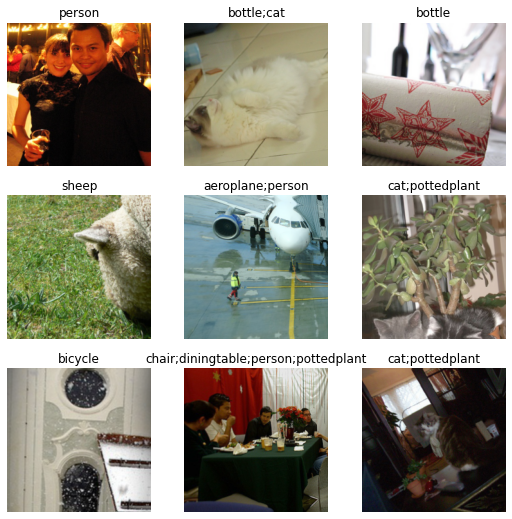

In [5]:
dls.show_batch()

In [6]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.033113110810518265)

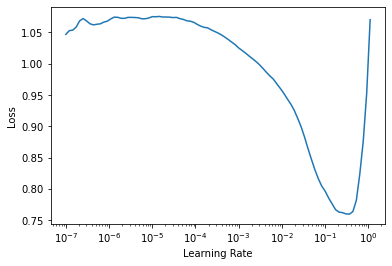

In [7]:
learn.lr_find()

In [8]:
learn.fine_tune(4, 3e-2)

In [9]:
learn.show_results()

In [10]:
learn.predict(path / "train/000005.jpg")

((#2) ['chair','diningtable'],
 tensor([False, False, False, False, False, False, False, False,  True, False,
          True, False, False, False, False, False, False, False, False, False]),
 tensor([6.9461e-04, 2.7642e-03, 2.1119e-03, 2.1670e-03, 3.1315e-02, 1.4917e-03,
         1.8938e-03, 3.7009e-03, 9.1856e-01, 7.0225e-04, 6.2395e-01, 6.4951e-03,
         1.9161e-04, 2.0448e-03, 1.2458e-01, 1.5618e-01, 2.5640e-04, 2.5483e-01,
         7.1794e-04, 6.1613e-02]))

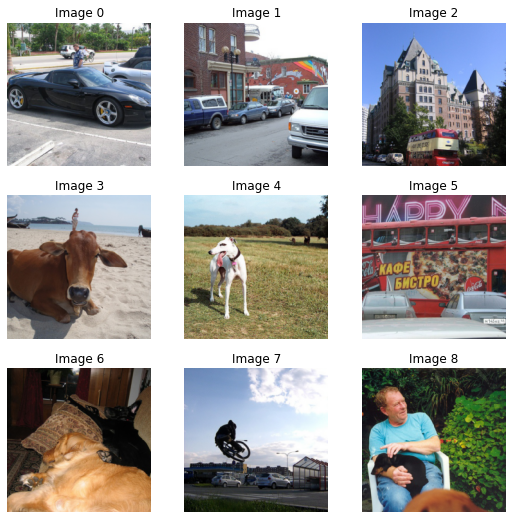

In [11]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [12]:
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [13]:
pascal = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    splitter=ColSplitter("is_valid"),
    get_x=ColReader("fname", pref=str(path / "train") + os.path.sep),
    get_y=ColReader("labels", label_delim=" "),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224),
)

In [14]:
dls = pascal.dataloaders(df)

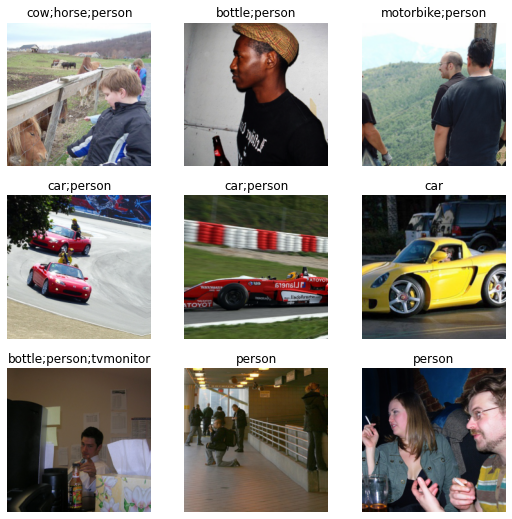

In [15]:
dls.show_batch(max_n=9)

In [2]:
path = untar_data(URLs.CAMVID_TINY)

In [3]:
codes = np.loadtxt(path / "codes.txt", dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [4]:
fnames = get_image_files(path / "images")
fnames[0]

Path('/home/neal/.fastai/data/camvid_tiny/images/Seq05VD_f00090.png')

In [5]:
(path / "labels").ls()[0]

Path('/home/neal/.fastai/data/camvid_tiny/labels/0016E5_08057_P.png')

In [6]:
def label_func(fn):
    return path / "labels" / f"{fn.stem}_P{fn.suffix}"

In [7]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=fnames, label_func=label_func, codes=codes
)

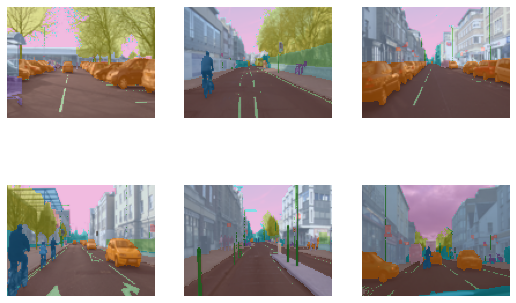

In [8]:
dls.show_batch(max_n=6)

In [9]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

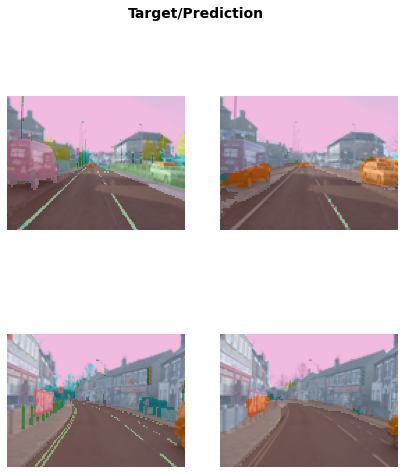

In [10]:
learn.show_results(max_n=6, figsize=(7, 8))

In [11]:
camvid = DataBlock(
    blocks=(ImageBlock, MaskBlock(codes)),
    get_items=get_image_files,
    get_y=label_func,
    splitter=RandomSplitter(),
    batch_tfms=aug_transforms(size=(120, 160)),
)

In [12]:
dls = camvid.dataloaders(path / "images", path=path, bs=8)

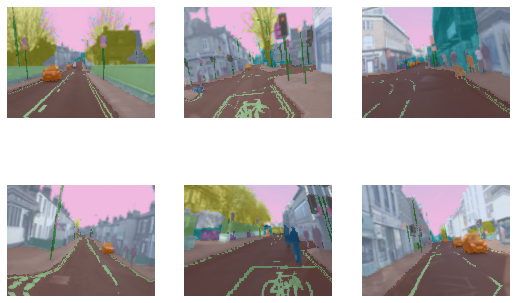

In [13]:
dls.show_batch(max_n=6)

In [15]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [16]:
(path / "01").ls()

(#1000) [Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00461_pose.txt'),Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00390_rgb.jpg'),Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00436_rgb.jpg'),Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00267_rgb.jpg'),Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00462_pose.txt'),Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00060_pose.txt'),Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00355_pose.txt'),Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00452_pose.txt'),Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00199_pose.txt'),Path('/home/neal/.fastai/data/biwi_head_pose/01/frame_00142_pose.txt')...]

In [17]:
img_files = get_image_files(path)


def img2pose(x):
    return Path(f"{str(x)[:-7]}pose.txt")


img2pose(img_files[0])

Path('/home/neal/.fastai/data/biwi_head_pose/15/frame_00390_pose.txt')

In [18]:
im = PILImage.create(img_files[0])
im.shape

(480, 640)

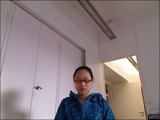

In [20]:
im.to_thumb(160)

In [21]:
cal = np.genfromtxt(path / "01" / "rgb.cal", skip_footer=6)


def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0] / ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1] / ctr[2] + cal[1][2]
    return tensor([c1, c2])

In [22]:
get_ctr(img_files[0])

tensor([349.7391, 323.1835])

In [23]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name == "13"),
    batch_tfms=[
        *aug_transforms(size=(240, 320)),
        Normalize.from_stats(*imagenet_stats),
    ],
)

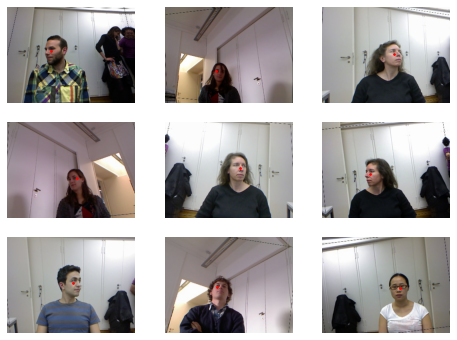

In [24]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(8, 6))

In [26]:
learn = cnn_learner(dls, resnet18, y_range=(-1, 1))

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.03981071710586548)

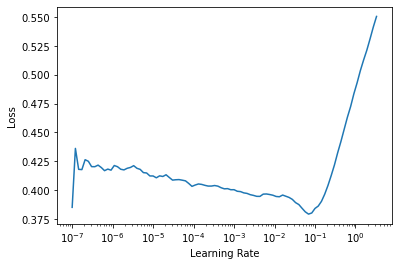

In [27]:
learn.lr_find()

In [28]:
learn.fine_tune(4, 5e-3)

In [29]:
math.sqrt(0.0001)

0.01

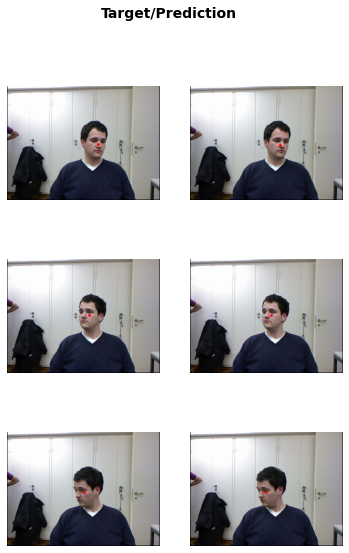

In [30]:
learn.show_results()

## text below

In [1]:
from fastai.text.all import *

In [4]:
path = untar_data(URLs.IMDB)
path.ls()

(#8) [Path('/home/neal/.fastai/data/imdb/models'),Path('/home/neal/.fastai/data/imdb/unsup'),Path('/home/neal/.fastai/data/imdb/tmp_clas'),Path('/home/neal/.fastai/data/imdb/train'),Path('/home/neal/.fastai/data/imdb/tmp_lm'),Path('/home/neal/.fastai/data/imdb/README'),Path('/home/neal/.fastai/data/imdb/test'),Path('/home/neal/.fastai/data/imdb/imdb.vocab')]

In [3]:
(path / "train").ls()

(#4) [Path('/home/neal/.fastai/data/imdb/train/pos'),Path('/home/neal/.fastai/data/imdb/train/unsupBow.feat'),Path('/home/neal/.fastai/data/imdb/train/neg'),Path('/home/neal/.fastai/data/imdb/train/labeledBow.feat')]

In [3]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid="test")

In [5]:
dls.show_batch()

In [4]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [7]:
learn.fine_tune(4, 1e-2)

RuntimeError: CUDA out of memory. Tried to allocate 92.00 MiB (GPU 0; 7.79 GiB total capacity; 5.79 GiB already allocated; 104.56 MiB free; 5.94 GiB reserved in total by PyTorch)

In [5]:
learn.show_results()

In [6]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.4702, 0.5298]))

In [9]:
imdb = DataBlock(
    blocks=(TextBlock.from_folder(path), CategoryBlock),
    get_items=get_text_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(valid_name="test"),
)

In [10]:
dls = imdb.dataloaders(path)

In [5]:
dls_lm = TextDataLoaders.from_folder(path, is_lm=True, valid_pct=0.1)

In [12]:
dls_lm.show_batch(max_n=5)

In [13]:
learn = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()], path=path, wd=0.1).to_fp16()

In [14]:
learn.fit_one_cycle(1, 1e-2)

In [15]:
learn.save('1epoch')

Path('/home/neal/.fastai/data/imdb/models/1epoch.pth')

In [16]:
learn = learn.load('1epoch')

In [17]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3)

In [28]:
learn.save_encoder('finetuned')

In [23]:
TEXT = "I hate this movie because"
N_WORDS = 100
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [24]:
print("\n".join(preds))

i hate this movie because it 's a tad too much to make a good movie . The plot is terrible . It 's too Bad for a movie . The movie is about " people " who deal with the bad guys and bad guys . Someone in the Hollywood film had failed miserably . In fact , the only good thing this movie should have was a girl with a big red hair . Do n't waste your time watching this movie . i have to say that the film did not have any
i hate this movie because it is so bad . And when John Candy gets undercover , you get the sense that he 's trying to play an evil detective . But he pretends that his wife is Robin Williams who is trying to help out her . The story is great especially if you do n't want to know why . It 's the best movie from Superman I 've ever seen . It 's a classic movie . My favorite part of this movie is the music by Richard


In [6]:
dls_clas = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', text_vocab=dls_lm.vocab)

In [11]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [12]:
learn = learn.load_encoder('finetuned')

In [30]:
learn.fit_one_cycle(1, 2e-2)

In [31]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))